In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle
from scipy.stats import norm

#%matplotlib notebook


In [3]:
data_np = np.loadtxt("Ising/Main2/longnear.txt", skiprows=0)

data_np1 = np.loadtxt("Ising/Main/longnear.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("Ising/Main1/longnear.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("Ising/Canonical_near_phase/longnear1.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]


lengths = np.unique(data_np[:, 0])
 

data_save = []


for l in lengths:
    #if (l>9000):
    #    continue
        
    #if (l==6000): continue
        
        
    data_l1 = data_np[data_np[:,0]==l]
    
    J_plot = []#data_l[:, 1]
    J_l =  np.unique(data_l1[:, 1])
    
    bc = []
    errs=[]
    J_lplot = []
    for J in J_l :
        
        data_l = data_l1[data_l1[:,1]==J]
        
        ind = np.argmin(data_l[:, 16])
        #print(ind, len(data_l[:, 16]))
        
        data_l = data_l[ind, :]
 
        
        data_save.append(data_l)

In [4]:
np.array(data_save)
np.savetxt('Ising/long_chains_header.txt', data_save, delimiter=' ')

In [5]:
data_pd = pd.read_csv('Ising/long_chains_header.txt', delimiter=' ')
data_pd

,2.000000000000000000e+03,8.209999999999999520e-01,0.000000000000000000e+00,1.520829999999999927e+04,7.422539999999999338e+01,2.315739999999999782e+03,7.722830000000000084e+00,6.324699999999999767e-01,3.928529999999999739e-04,4.029229999999999756e-01,4.934419999999999692e-04,1.669360000000000011e-01,3.974320000000000261e-04,2.333860000000000101e-01,1.018320000000000076e-03,8.323890000000000455e-02,6.673440000000000535e-04,1.858419999999999864e-02,2.670920000000000238e-04,1.020000000000000000e+12
0,2000.0,0.824,0.0,13784.70,6.034090e+01,2127.92,7.50923,0.613924,0.000347,0.379974,0.000423,0.148950,0.000322,0.257789,0.001060,0.100319,0.000772,0.025880,0.000363,9.900000e+11
1,2000.0,0.827,0.0,12480.70,5.088160e+01,1952.48,6.82489,0.594961,0.000341,0.357208,0.000401,0.132115,0.000286,0.285665,0.001284,0.121267,0.000935,0.035933,0.000447,9.600000e+11
2,2000.0,0.830,0.0,11266.20,5.741780e+01,1796.87,8.29710,0.575784,0.000492,0.334986,0.000559,0.116760,0.000373,0.313884,0.002089,0.144850,0.001581,0.049145,0.000809,7.150000e+11
3,2000.0,0.833,0.0,9972.85,6.012960e+01,1623.28,11.62190,0.554136,0.000435,0.310642,0.000479,0.100874,0.000303,0.356985,0.001913,0.181178,0.001604,0.070222,0.000947,6.800000e+11
4,2000.0,0.836,0.0,8624.09,5.996080e+01,1437.69,8.84929,0.532701,0.000527,0.287431,0.000560,0.086781,0.000329,0.403958,0.002358,0.224242,0.002100,0.098343,0.001355,6.400000e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,10000.0,0.845,0.0,54081.80,3.758820e+04,18969.20,15300.00000,0.386477,0.005754,0.150533,0.004884,0.023479,0.001844,0.774806,0.020626,0.627254,0.024853,0.433504,0.024053,1.750000e+11
86,10000.0,0.848,0.0,15087.10,5.035690e+03,8050.96,5007.61000,0.362588,0.001443,0.131990,0.001128,0.017716,0.000359,0.855128,0.005292,0.737006,0.008260,0.557493,0.010691,1.600000e+11
87,10000.0,0.851,0.0,69601.00,5.793320e+04,25781.40,22725.70000,0.358818,0.007533,0.130053,0.006237,0.017898,0.002339,0.855048,0.015927,0.740802,0.023161,0.569714,0.027310,1.450000e+11
88,10000.0,0.854,0.0,88170.70,7.693770e+04,32966.50,28830.30000,0.346082,0.006331,0.121132,0.005321,0.015776,0.002180,0.877503,0.016633,0.779026,0.024408,0.627178,0.028771,1.400000e+11


In [6]:
dataread = np.loadtxt("Ising/long_chains_header.txt")
dataread[:, 0]

array([ 2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  3000.,  3000.,  3000.,
        3000.,  3000.,  3000.,  3000.,  3000.,  3000.,  3000.,  3000.,
        3000.,  3000.,  5000.,  5000.,  5000.,  5000.,  5000.,  5000.,
        5000.,  5000.,  5000.,  5000.,  5000.,  5000.,  5000.,  5000.,
        6000.,  6000.,  6000.,  6000.,  6000.,  7000.,  7000.,  7000.,
        7000.,  7000.,  7500.,  7500.,  7500.,  7500.,  7500.,  7500.,
        7500.,  7500.,  7500.,  7500.,  7500.,  7500.,  7500.,  7500.,
        8000.,  8000.,  8000.,  8000.,  8000.,  9000.,  9000.,  9000.,
        9000.,  9000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000.])

In [14]:
lengths

array([ 4900.,  6400.,  8100., 10000.])

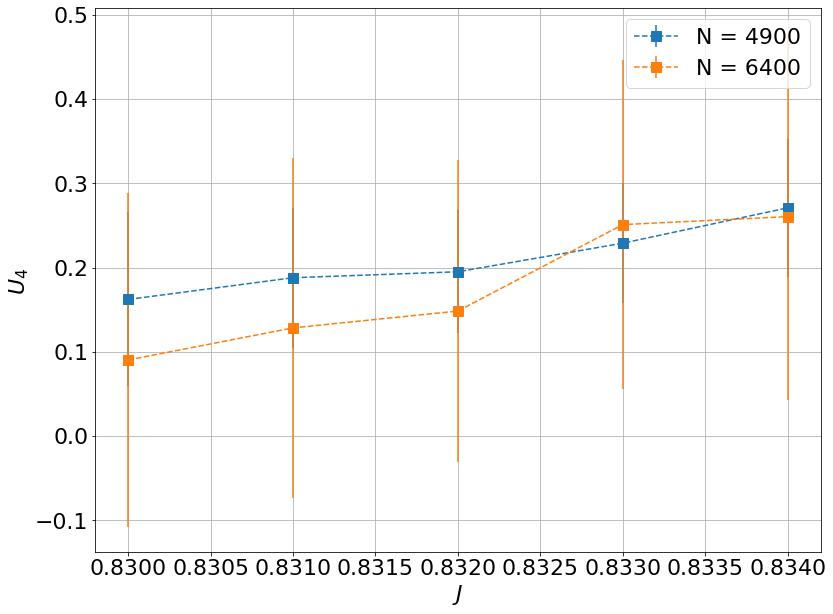

In [18]:
 
data_np =np.loadtxt("Ising/Geometry_Results/long/Energy_Ising.txt", skiprows=0)
#data_np = data_np[]


y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]


lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

for l in lengths:
    if (l>8000): continue
        #continue
        
    #if (l==6000): continue
        
        
    data_l1 = data_np[data_np[:,0]==l]
    
    J_plot = []#data_l[:, 1]
    J_l =  np.unique(data_l1[:, 1])
    
    bc = []
    errs=[]
    J_lplot = []
    for J in J_l :
        
        data_l = data_l1[data_l1[:,1]==J]
        
        ind = np.argmin(data_l[:, 16])
        
        data_l = data_l[ind, :]
 
        
        m2 = norm.rvs(data_l[15], data_l[16], size =  1000 )
        m4 = norm.rvs(data_l[17], data_l[18], size =  1000 )
 
        cum = 1 - m4/3/m2/m2
 
        
        mean = np.mean(cum)
        
        err=np.std(cum) 
        
        #if (err>0.06): continue
        
        bc.append(mean)
        errs.append(err)
        J_lplot.append(J)

    plt.errorbar(J_lplot, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
    
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(0.02, 0.6)
#plt.xlim(0.825, 0.844)
#plt.xlim(0.825, 0.838)
plt.grid()

plt.legend(loc="best", fontsize=22)
#plt.savefig("/home/kamilla/SAW_paper_KF_1/img/bindercumulants_longchains.png")

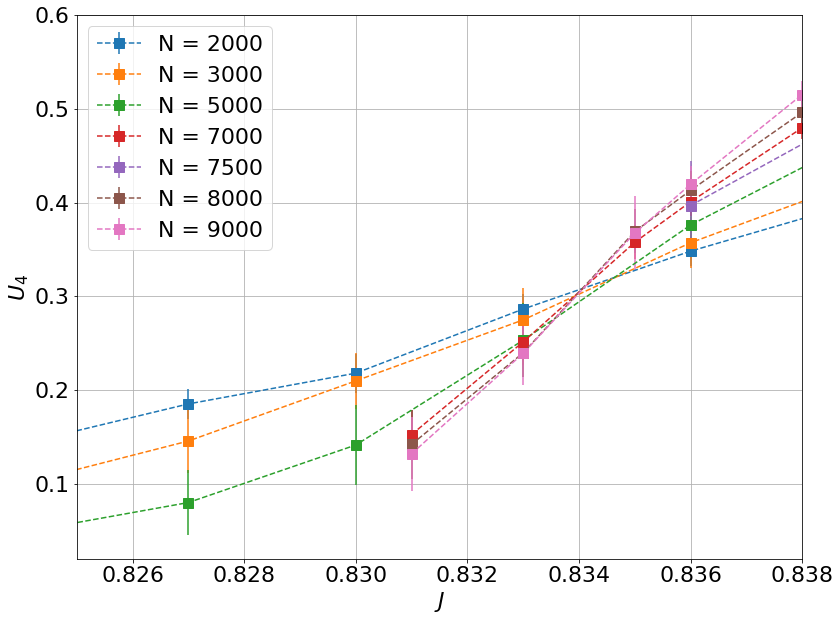

In [29]:
data_np = np.loadtxt("Ising/Main2/longnear.txt", skiprows=0)

data_np1 = np.loadtxt("Ising/Main/longnear.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))


data_np1 = np.loadtxt("Ising/Main1/longnear.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("Ising/Canonical_near_phase/longnear1.txt", skiprows=1)
data_np = np.vstack((data_np, data_np1))


#data_np = data_np[]


y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]


lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

for l in lengths:
    if (l>9000):
        continue
        
    if (l==6000): continue
        
        
    data_l1 = data_np[data_np[:,0]==l]
    
    J_plot = []#data_l[:, 1]
    J_l =  np.unique(data_l1[:, 1])
    
    bc = []
    errs=[]
    J_lplot = []
    for J in J_l :
        
        data_l = data_l1[data_l1[:,1]==J]
        
        ind = np.argmin(data_l[:, 16])
        
        data_l = data_l[ind, :]
 
        
        m2 = norm.rvs(data_l[15], data_l[16], size =  1000 )
        m4 = norm.rvs(data_l[17], data_l[18], size =  1000 )
 
        cum = 1 - m4/3/m2/m2
 
        
        mean = np.mean(cum)
        
        err=np.std(cum) 
        
        if (err>0.06): continue
        
        bc.append(mean)
        errs.append(err)
        J_lplot.append(J)

    plt.errorbar(J_lplot, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
    
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(0.02, 0.6)
#plt.xlim(0.825, 0.844)
plt.xlim(0.825, 0.838)
plt.grid()

plt.legend(loc="best", fontsize=22)
plt.savefig("/home/kamilla/SAW_paper_KF_1/img/bindercumulants_longchains.png")
#plt.savefig("/home/kamilla/Lattice_models/img/bc_mainplot.png")

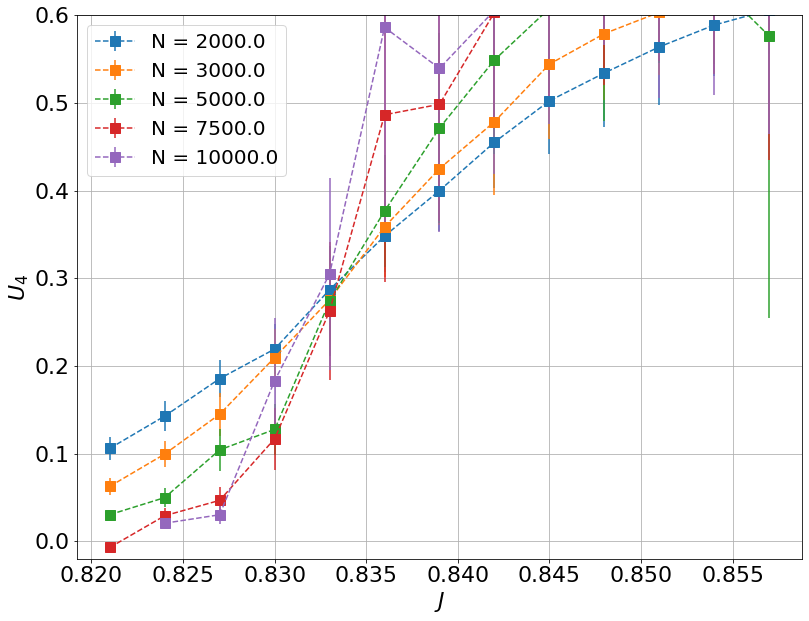

In [7]:
data_np = np.loadtxt("Ising/Main/longnear.txt", skiprows=0)



data_np = np.loadtxt("Ising/Canonical_near_phase/longnear1.txt", skiprows=1)
y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

#data_np = np.loadtxt("Ising/ClusterUpdate/longnear2.txt")
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    if (l<100):
        continue
        
        
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]
    errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    errs=np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(-0.02, 0.6)

plt.grid()

plt.legend(loc="best", fontsize=20)

#plt.savefig("/home/kamilla/Lattice_models/img/bcfar_canonical_deeperlong.png")

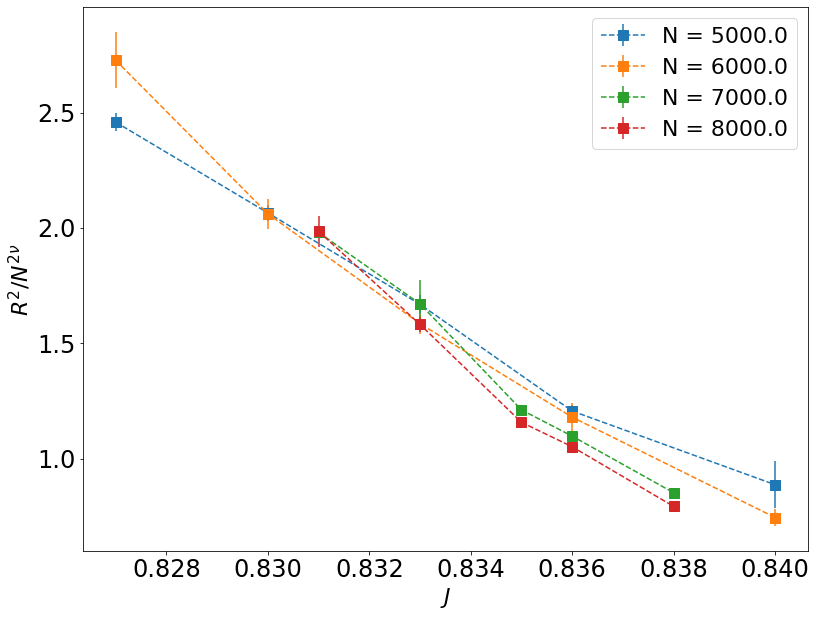

In [21]:
 
    
nu = 4/7    
data_np = np.loadtxt("Ising/Main2/longnear.txt", skiprows=0)

data_np1 = np.loadtxt("Ising/Main/longnear.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<8000]

data_np = np.vstack((data_np, data_np1))


data_np1 = np.loadtxt("Ising/Main1/longnear.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]


lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

for l in lengths:
    if (l>8000):
        continue
    if(l==7500):
        continue
        
        
    data_l1 = data_np[data_np[:,0]==l]
    
    J_plot = []#data_l[:, 1]
    J_l =  np.unique(data_l1[:, 1])
    
    bc = []
    errs=[]
    
    for J in J_l :
        
        data_l = data_l1[data_l1[:,1]==J]
        
        ind = np.argmin(data_l[:, 4])
        
        data_l = data_l[ind, :]
 
        r_l = data_l[3]
        rl_scale = r_l/np.power(l, 2*nu)
 

        err = data_l[4]/np.power(l, 2*nu)
        bc.append(rl_scale)
        errs.append(err)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))

       
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ R^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 
#plt.ylim(-0.02, 4)

plt.legend(fontsize=22)

#plt.grid()

#plt.savefig("/home/kamilla/Lattice_models/img/rscaling.png")

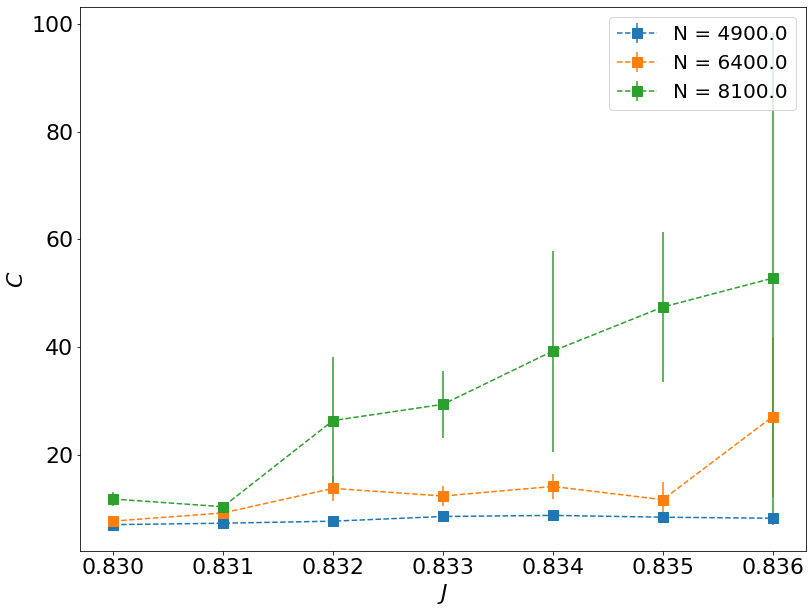

In [2]:
data_np = np.loadtxt("Ising/Main2/longnear.txt", skiprows=0)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)


data_np = np.loadtxt("Ising/Geometry_Results/long/Energy_Ising.txt", skiprows=0)

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 0.835
 
 
gamma = 9/3.5
nu= 3.5
power = -gamma/nu


 
for l in lengths:
    
    if (l>9250):
        continue
    
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    #m2 = data_l[:,17]/J_l
    
    
    m2 = (data_l[:,9] - data_l[:,7]*data_l[:,7])*np.square(J_l)*l
    
    x = np.abs(J_l-Tc)
    x = J_l-Tc
    #y = m2/J_l*np.power(L, -8/7)
    y = m2 
    
    errs =  data_l[:,10]*data_l[:,10] + 4*data_l[:,8]*data_l[:,8]*data_l[:,7]*data_l[:,7]
    #errs = data_l[:,16]*y

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(J_l, y, yerr=errs*np.square(J_l)*l, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ C  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)



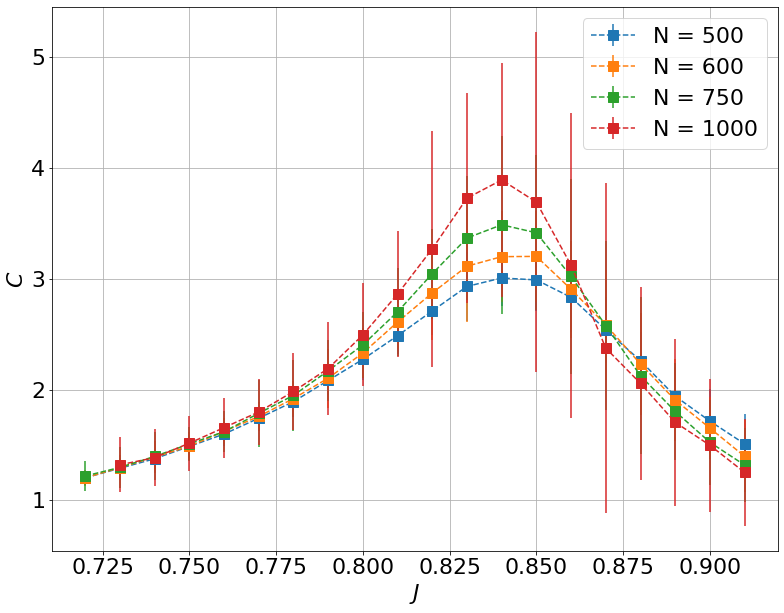

In [6]:
 
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = data_np[]


y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]


lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

for l in lengths:
    if (l<500): continue
    
    if (l>8000): continue
        #continue
        
    #if (l==6000): continue
        
        
    data_l1 = data_np[data_np[:,0]==l]
    
    J_plot = []#data_l[:, 1]
    J_l =  np.unique(data_l1[:, 1])
    
    bc = []
    errs=[]
    J_lplot = []
    for J in J_l :
        
        data_l = data_l1[data_l1[:,1]==J]
        
        ind = np.argmin(data_l[:, 16])
        
        data_l = data_l[ind, :]
        m2 = norm.rvs(data_l[7], data_l[8], size =  1000 )
        m4 = norm.rvs(data_l[9], data_l[10], size =  1000 )
        cum = m4-m2*m2
        mean = np.mean(cum)*l*J*J
        err=np.std(cum)*l*J*J
        
        #if (err>0.06): continue
        
        bc.append(mean)
        errs.append(err)
        J_lplot.append(J)

    plt.errorbar(J_lplot, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
    
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ C $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(0.02, 0.6)
#plt.xlim(0.825, 0.844)
#plt.xlim(0.825, 0.838)
plt.grid()

plt.legend(loc="best", fontsize=22)

plt.savefig("/home/kamilla/SAW_paper_KF_1/img/heatcapacity.png")


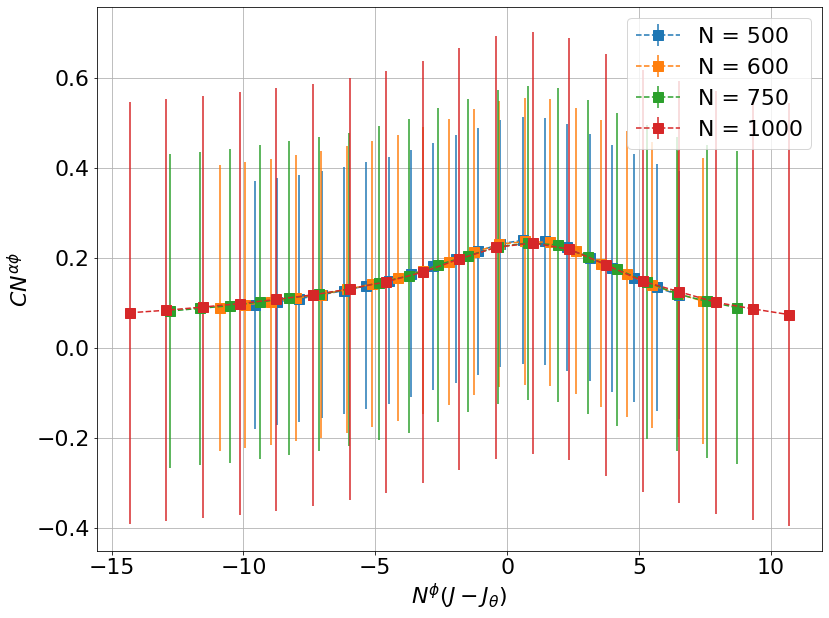

In [29]:
 
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = data_np[]


y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]


lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

J_crit = 0.833

for l in lengths:
    if (l<500): continue
    
    if (l>8000): continue
        #continue
        
    #if (l==6000): continue
        
        
    data_l1 = data_np[data_np[:,0]==l]
    
    J_plot = []#data_l[:, 1]
    J_l =  np.unique(data_l1[:, 1])
    
    bc = []
    errs=[]
    J_lplot = []
    for J in J_l :
        
        data_l = data_l1[data_l1[:,1]==J]
        
        ind = np.argmin(data_l[:, 16])
        
        data_l = data_l[ind, :]
        m2 = norm.rvs(data_l[7], data_l[8], size =  1000 )
        m4 = norm.rvs(data_l[9], data_l[10], size =  1000 )
        cum = m4-m2*m2
        mean = np.mean(cum)*l*J*J
        err=np.std(cum)*l*J*J
        
        bc.append(mean)
        errs.append(err)
        J_lplot.append(J)

        
    x = np.array(J_lplot)
    y = np.array(bc)
    yerrs = np.array(err)
    
    phi = 5/7
    
    x = (x-J_crit)*np.power(l, phi)
    y = y*np.power(l, -4/7*phi)
    plt.errorbar(x, y, yerr=yerrs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
    
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$ N ^{ \phi } (J-J_{\theta}) $', fontsize = 22)
#plt.ylabel(r"$ C / N ^{\frac{1}{2} \alpha \phi}$ ", fontsize=22)
plt.ylabel(r"$ C N ^{ \alpha \phi }$ ", fontsize=22)

plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(0.02, 0.6)
#plt.xlim(0.825, 0.844)
#plt.xlim(0.825, 0.838)
plt.grid()

plt.legend(loc="best", fontsize=22)

plt.savefig("/home/kamilla/SAW_paper_KF_1/img/heatcapacity_rescale.png")